In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [3]:
wine = datasets.load_wine()
X = wine.data[:,:2]
y = wine.target

In [4]:
print('X数据情况：{}'.format(X.shape))

X数据情况：(178, 2)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
print('X_train:{}, X_test:{}'.format(X_train.shape, X_test.shape))

X_train:(133, 2), X_test:(45, 2)


In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [7]:
print('模型评分：{:.2f}'.format(clf.score(X_test, y_test)))
print('模型评分2：{:.2f}'.format(clf.score(X_train, y_train)))

模型评分：0.89
模型评分2：1.00


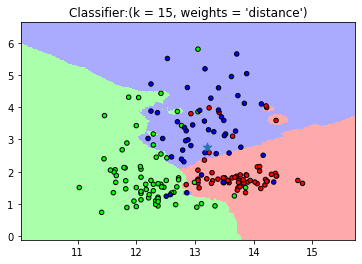

In [8]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(k = 15, weights = 'distance')")
plt.scatter(13.2, 2.77, marker='*', s=80)

plt.show()

In [8]:
X_new = np.array([[13.2, 2.77]])
prediction = clf.predict(X_new)
print("预测新红酒的分类为：{}".format(wine['target_names'][prediction]))

预测新红酒的分类为：['class_2']


In [9]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [10]:
print('模型评分：{:.2f}'.format(clf2.score(X_test, y_test)))

模型评分：0.84


In [11]:
prediction2 = clf2.predict(X_new)
print("预测新红酒的分类为：{}".format(wine['target_names'][prediction2]))

预测新红酒的分类为：['class_2']


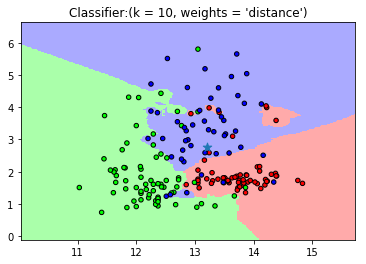

In [12]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(k = 10, weights = 'distance')")
plt.scatter(13.2, 2.77, marker='*', s=80)

plt.show()

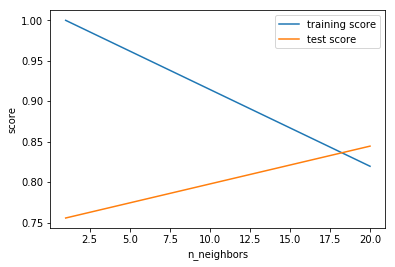

In [16]:
#建立两个空列表，分别对于训练数据集和测试数据集的模型评分
training_score = []
test_score = []
neighbors_amount = [1,20]
for n_neighbors in neighbors_amount:
    clf3 = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    clf3.fit(X_train, y_train)
    #把不同的n_neighbors数量对应的得分放进列表
    training_score.append(clf3.score(X_train, y_train))
    test_score.append(clf3.score(X_test, y_test))
    
#下面用matplotlib将得分进行绘图
plt.plot(neighbors_amount, training_score, label = "training score")
plt.plot(neighbors_amount, test_score, label = "test score")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
    